## Online shop Sales Analysis

#### Import necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#### Read dataframe

In [6]:
df = pd.read_csv('./Online-Sales.csv')
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


#### Converting Numerical Values To Categorical

##### 1-Gender = 0: Male, 1: Female
##### 2-Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other
##### 3-Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other
##### 4-Newsletter = 0: not subscribed, 1: subscribed
##### 5-Voucher = 0: not used, 1: used

In [10]:
def gender(g):
    d = {0:'Male',1:'Female'}
    return d[g]
def payMethod(g):
    d = {0:'Digital Wallets',1:'Card',2:'Card',3:'Other'}
    return d[g]
def browser(g):
    d = {0:'Chrome',1:'Safari',2:'Edge',3:'Other'}
    return d[g]
def newsletter(g):
    d = {0:'not subscribed',1:'subscribed'}
    return d[g]
def voucher(g):
    d = {0:'not used',1:'used'}
    return d[g]

In [11]:
df['Gender'] = df['Gender'].apply(gender)
df['Pay_Method'] = df['Pay_Method'].apply(payMethod)
df['Browser'] = df['Browser'].apply(browser)
df['Newsletter'] = df['Newsletter'].apply(newsletter)
df['Voucher'] = df['Voucher'].apply(voucher)

In [12]:
df['Purchase_DATE'] = pd.to_datetime(df['Purchase_DATE'])

C:\Users\PC\AppData\Local\Temp\ipykernel_15100\2340794737.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Purchase_DATE'] = pd.to_datetime(df['Purchase_DATE'])


In [13]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,not subscribed,not used
1,504309,18,Female,36.2,3,2021-10-12,2.896,Card,656,Chrome,not subscribed,used
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,subscribed,not used
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,subscribed,not used
4,504312,21,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,subscribed,not used


### What Age Group Buys from us the most ? 

#### Create an age range : 

In [16]:
def groupAge(v):
    lower = (v // 10) * 10 # get decacde
    mid = lower + 5
    upper = lower + 10
    return f"{lower}s-{mid}s" if v % 10 <= 5 else f"{mid}s-{upper}s"
df['Group-Age'] = df['Age'].apply(groupAge)
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Group-Age
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,not subscribed,not used,50s-55s
1,504309,18,Female,36.2,3,2021-10-12,2.896,Card,656,Chrome,not subscribed,used,15s-20s
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,subscribed,not used,50s-55s
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,subscribed,not used,25s-30s
4,504312,21,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,subscribed,not used,20s-25s


#### Move the column Group-Age

In [18]:
col = df.pop('Group-Age')
df.insert(2,'Group-Age',col)

In [19]:
df.head()

,Customer_id,Age,Group-Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,50s-55s,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,not subscribed,not used
1,504309,18,15s-20s,Female,36.2,3,2021-10-12,2.896,Card,656,Chrome,not subscribed,used
2,504310,52,50s-55s,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,subscribed,not used
3,504311,29,25s-30s,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,subscribed,not used
4,504312,21,20s-25s,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,subscribed,not used


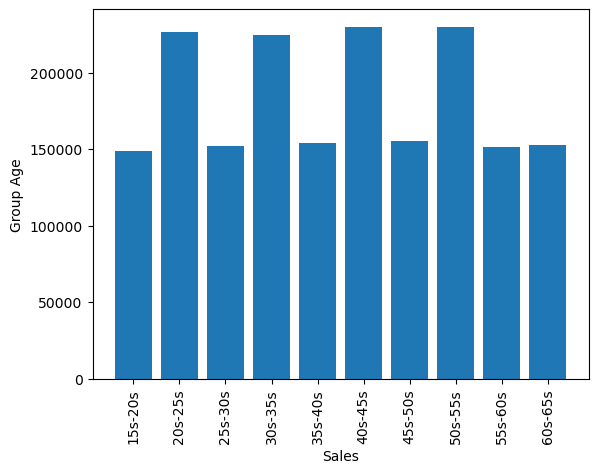

In [20]:
group_buy_most = df.groupby('Group-Age')['Revenue_Total'].sum()
fig, ax = plt.subplots()
ax.bar(group_buy_most.index, group_buy_most.values)
ax.set_xlabel('Sales')
ax.set_ylabel('Group Age')
plt.xticks(rotation='vertical', size=10)
plt.show()

### What Payment Method is used most by Age_Groups

In [23]:
pay_method_counts = df.groupby(['Group-Age'])['Pay_Method'].value_counts()
pay_method_counts

Group-Age  Pay_Method     
15s-20s    Card               2746
           Digital Wallets    1584
           Other              1046
20s-25s    Card               4259
           Digital Wallets    2373
           Other              1531
25s-30s    Card               2865
           Digital Wallets    1570
           Other              1049
30s-35s    Card               4249
           Digital Wallets    2387
           Other              1512
35s-40s    Card               2843
           Digital Wallets    1607
           Other              1057
40s-45s    Card               4314
           Digital Wallets    2349
           Other              1568
45s-50s    Card               2997
           Digital Wallets    1591
           Other              1031
50s-55s    Card               4372
           Digital Wallets    2400
           Other              1531
55s-60s    Card               2806
           Digital Wallets    1592
           Other              1037
60s-65s    Card             

In [24]:
most_used_payment = df['Pay_Method'].value_counts().idxmax()
most_used_payment

'Card'

### What Browsers Our Customers use most ?

In [26]:
most_used_browser = df['Browser'].value_counts()
most_used_browser

Browser
Chrome    42076
Safari    13135
Other      7208
Edge       3377
Name: count, dtype: int64

### Best Month For Sale  

In [28]:
best_month_sales = df.groupby(df['Purchase_DATE'].dt.month)['Purchase_VALUE'].agg(['sum'])
best_month_sales

,sum
Purchase_DATE,
1,89459.438
2,82065.269
3,89367.929
4,85409.355
5,87938.008
6,87737.820
7,87886.125
8,89494.439
9,85374.270


### Highest Orders In Months

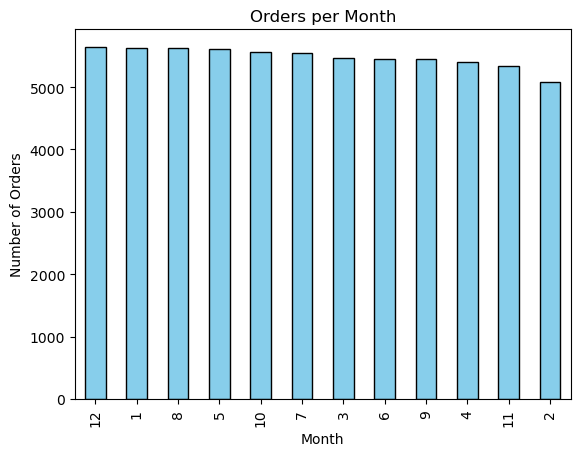

In [30]:
df['month'] = df['Purchase_DATE'].dt.month
highest_orders = df['month'].value_counts()
highest_orders.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Orders per Month")
plt.show()

### Highest Sale In Month

In [86]:
highest_sale = df.groupby('month')['Purchase_VALUE'].sum()
highest_sale

month
1     89459.438
2     82065.269
3     89367.929
4     85409.355
5     87938.008
6     87737.820
7     87886.125
8     89494.439
9     85374.270
10    89876.060
11    84703.236
12    91364.573
Name: Purchase_VALUE, dtype: float64

##### As you can see in result , December is the best month for Sales.

### Who are our Best Customers (Males Or Females ?)

In [124]:
best_customers = df.groupby('Gender')[['Revenue_Total','N_Purchases']].agg(['sum','mean'])
best_customers

Revenue_Total            N_Purchases          
                 sum       mean         sum      mean
Gender                                               
Female     1224554.7  27.722419      176447  3.994544
Male        600161.5  27.754416       86242  3.988254

### What is the average time spent by male and female respectively on our Website ? 

In [122]:
average_time = df.groupby('Gender')['Time_Spent'].mean()
average_time

Gender
Female    599.235647
Male      598.292268
Name: Time_Spent, dtype: float64